In [87]:
# import libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [88]:
# load data from the csv file

companies = pd.read_csv("unicorn_dataset.csv")

In [89]:
# display the first 10 rows of the dataset

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [90]:
companies.size
companies.shape

(1074, 10)


The dataset has 1074 rows (entries) and 10 columns.

In [91]:
companies.drop_duplicates().shape

(1074, 10)

There are no duplicate values in the dataset.

In [92]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


We can see that the data contained in the "Year Founded" column is represented as an integer, while the "Data Joined" column is represented as an object.

In [93]:
companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


The `describe()` function only returns descriptive statistics of the numerical column "Year Founded".

From the minimum and maximum values we can see that the dataset contains data about unicorn companies founded between 1919 and 2021.

In [94]:
# convert the "Date Joined" column to datetime

companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])

Converting the "Date Joined" column to `datetime` splits every value into year, month, and date components.

In [95]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


In [96]:
# extract the Year component into a new column

companies["Year Joined"] = companies["Date Joined"].dt.year

In [97]:
# extract the Month component into a new column

companies["Month Joined"] = companies["Date Joined"].dt.month_name()

In [98]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December


Now let's visualize the time it took companies to reach unicorn status for each industry. We could also take a sample of the data.

In [99]:
# if we want to sample the data:
# companies_sample = companies.sample(n=50, random_state=42)

In [100]:
# create a new column
companies["Years to Unicorn"] = companies["Year Joined"] - companies["Year Founded"]

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years to Unicorn
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December,6


In [101]:
# group the data by industry, and for each industry get the max value in the `Years to Unicorn` column.

grouped = (companies[["Industry", "Years to Unicorn"]].groupby("Industry").max().sort_values(by="Years to Unicorn"))

grouped

,Years to Unicorn
Industry,
Artificial Intelligence,14
Auto & transportation,14
Travel,14
Artificial intelligence,15
Edtech,17
Hardware,18
Mobile & telecommunications,20
"Supply chain, logistics, & delivery",20
Cybersecurity,21


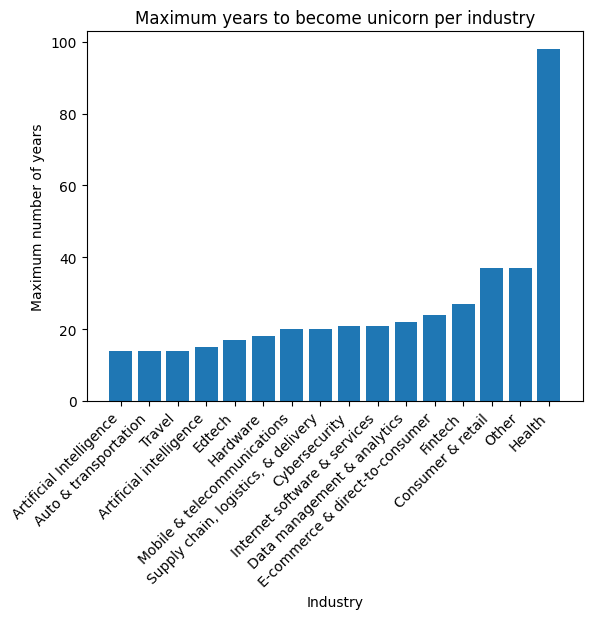

In [102]:
# create a bar plot

plt.bar(grouped.index, grouped["Years to Unicorn"])
plt.title("Maximum years to become unicorn per industry")
plt.xlabel("Industry")
plt.ylabel("Maximum number of years")

# rotate labels on the x-axis
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

In [103]:
companies["Industry"].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications', 'Artificial Intelligence'],
      dtype=object)

In [104]:
companies['Industry'] = companies['Industry'].str.replace('Artificial intelligence', 'Artificial Intelligence')

In [105]:
companies["Industry"].unique()

array(['Artificial Intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications'], dtype=object)

Next, we want to visualize the maximum valuation for each industry. We need to consider that the valuation coloumn contains string data, not numbers.

In [106]:
# create a column representing company valuation as numeric data

# create a new column
companies['Valuation (in billions)'] = companies['Valuation']

# remove the '$' from each value
companies['Valuation (in billions)'] = companies['Valuation (in billions)'].str.replace('$', '')

# remove the 'B' from each value
companies['Valuation (in billions)'] = companies['Valuation (in billions)'].str.replace('B', '')

# convert column data to integers
companies['Valuation (in billions)'] = companies['Valuation (in billions)'].astype('int')

companies.head()

<ipython-input-106-194bae994c60>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  companies['Valuation (in billions)'] = companies['Valuation (in billions)'].str.replace('$', '')


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years to Unicorn,Valuation (in billions)
0,Bytedance,$180B,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April,5,180
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December,10,100
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July,10,100
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January,4,95
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December,6,46


In [107]:
grouped = (companies[["Industry", "Valuation (in billions)"]].groupby("Industry").max().sort_values(by="Valuation (in billions)"))

grouped

,Valuation (in billions)
Industry,
Cybersecurity,9
Mobile & telecommunications,9
Travel,10
Auto & transportation,11
Hardware,12
Health,13
Edtech,22
Consumer & retail,38
Data management & analytics,38


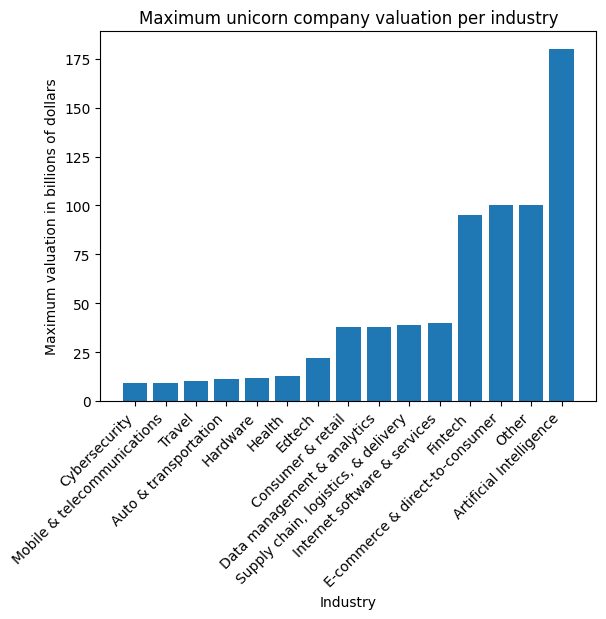

In [108]:
# create a bar plot

plt.bar(grouped.index, grouped["Valuation (in billions)"])

plt.title("Maximum unicorn company valuation per industry")
plt.xlabel("Industry")
plt.ylabel("Maximum valuation in billions of dollars")
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

In [109]:
companies["Year Founded"].value_counts().sort_values(ascending=False)

2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1992      1
1993      1
1990      1
1984      1
1996      1
1979      1
1991      1
1919      1
1997      1
Name: Year Founded, dtype: int64

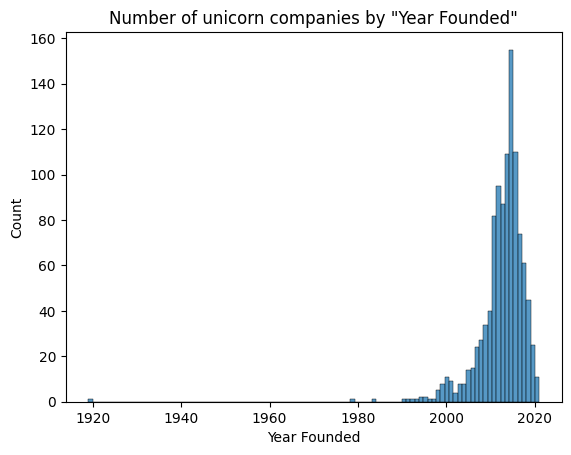

In [110]:
sns.histplot(data=companies, x='Year Founded')

plt.title('Number of unicorn companies by "Year Founded"');

In [111]:
companies_2021 = companies[companies["Date Joined"].dt.year == 2021]

companies_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years to Unicorn,Valuation (in billions)
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,July,3,32
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",2021,April,6,20
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",2021,February,10,14
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",2021,July,4,13
34,Getir,$12B,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",2021,March,6,12


In [112]:
# insert a "Week Joined" column into "companies_2021"

companies_2021.insert(3, "Week Joined", companies_2021["Date Joined"].dt.strftime('%Y - W%V'), True)

# group by "Week Joined"

companies_by_week_2021 = companies_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

In [114]:
companies_by_week_2021.head()

,Week Joined,Company Count
0,2021 - W01,12
1,2021 - W02,9
2,2021 - W03,5
3,2021 - W04,8
4,2021 - W05,4


In [115]:
companies_2020 = companies[companies["Date Joined"].dt.year == 2020]

# concatenate the 2020 subset with the 2021 subset
companies_2020_2021 = pd.concat([companies_2020, companies_2021.drop(columns="Week Joined")])

In [116]:
# add "Quarter Joined" column
companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y - Q%q')

# convert the "Valuation" column to numeric by removing the signs "$" and "B" and transforming values in "float" type
companies_2020_2021["Valuation"] =  companies_2020_2021["Valuation"].str.strip("$B").astype(float)

# group the dataframe by "Quarter Joined" and compute average (mean) of "Funding" column
companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})

companies_by_quarter_2020_2021.head()

,Quarter Joined,Average Valuation
0,2020 - Q1,3.444444
1,2020 - Q2,3.777778
2,2020 - Q3,3.896552
3,2020 - Q4,3.697674
4,2021 - Q1,2.750000


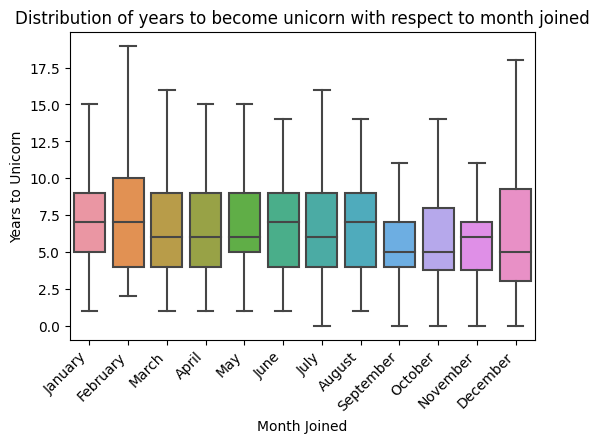

In [122]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November",
               "December"]

plt.figure(figsize=(6,4))
sns.boxplot(x=companies['Month Joined'],
            y=companies['Years to Unicorn'],
            order=month_order,
            showfliers=False)

plt.title('Distribution of years to become unicorn with respect to month joined')
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()


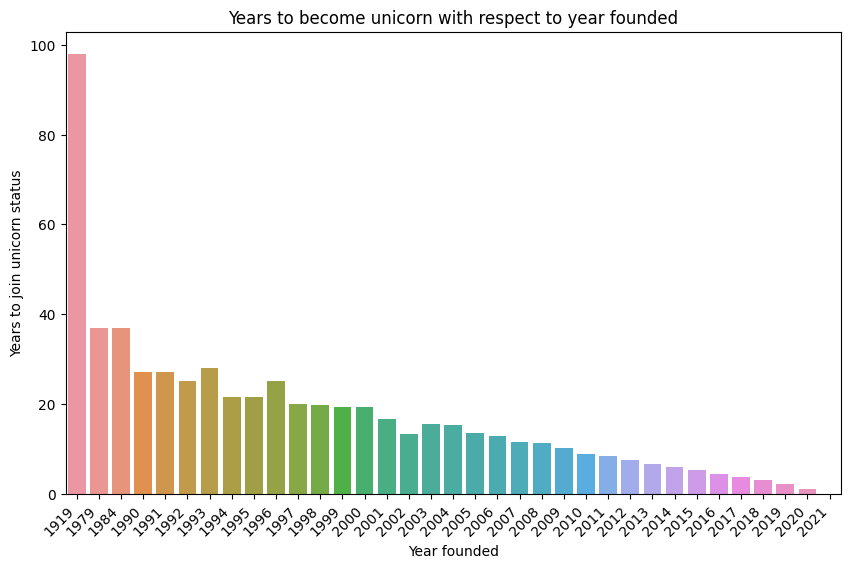

In [125]:
plt.figure(figsize=(10,6))

sns.barplot(x=companies["Year Founded"],
            y=companies["Years to Unicorn"],
            errorbar=('ci', False))

plt.title("Years to become unicorn with respect to year founded")
plt.xlabel("Year founded")
plt.ylabel("Years to join unicorn status")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

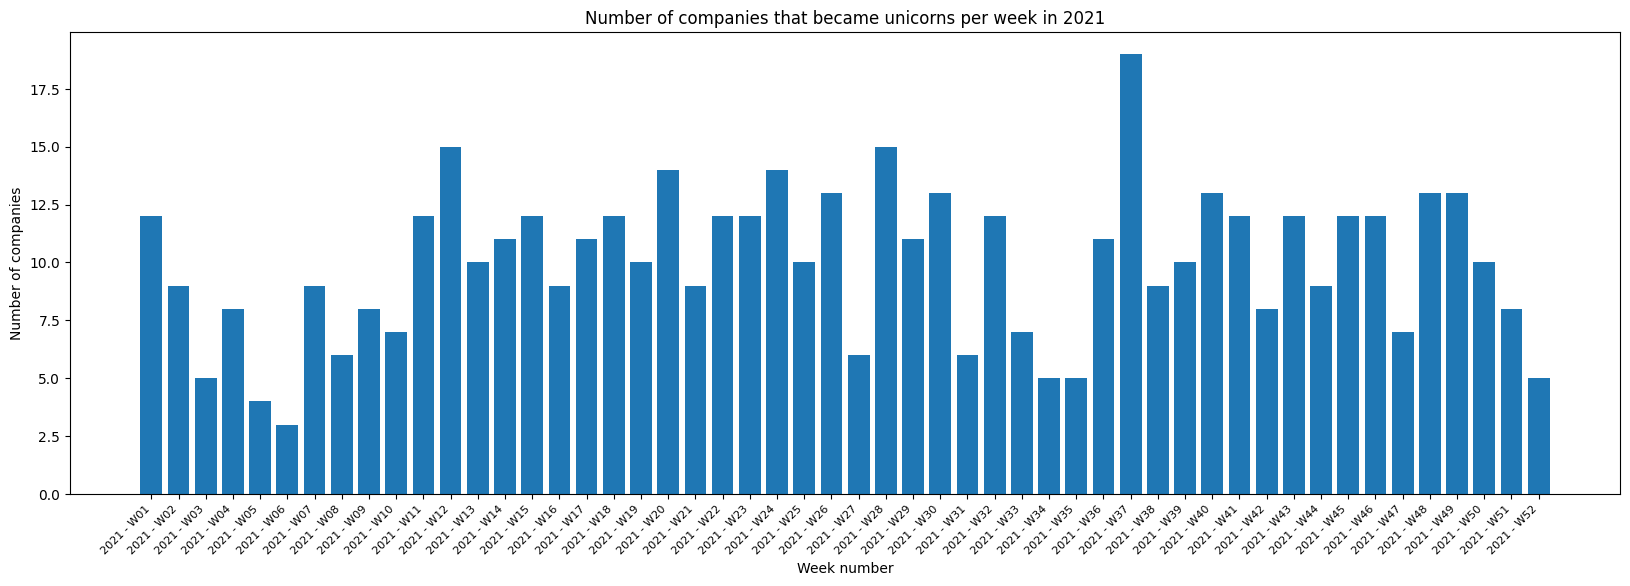

In [126]:
plt.figure(figsize = (20, 6))

plt.bar(x=companies_by_week_2021['Week Joined'],height=companies_by_week_2021['Company Count'])
plt.plot()

plt.xlabel("Week number")
plt.ylabel("Number of companies")
plt.title("Number of companies that became unicorns per week in 2021")
plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)

plt.show()

In [128]:
# recall that "Quarter Joined" was formatted as "2020 - Q1", "2020 - Q2" etc.

# using slicing, extract only "Q1", "Q2"...
companies_by_quarter_2020_2021['Quarter Number'] = companies_by_quarter_2020_2021['Quarter Joined'].str[-2:]

# using slicing, extract only the year
companies_by_quarter_2020_2021['Year Joined'] = companies_by_quarter_2020_2021['Quarter Joined'].str[:4]


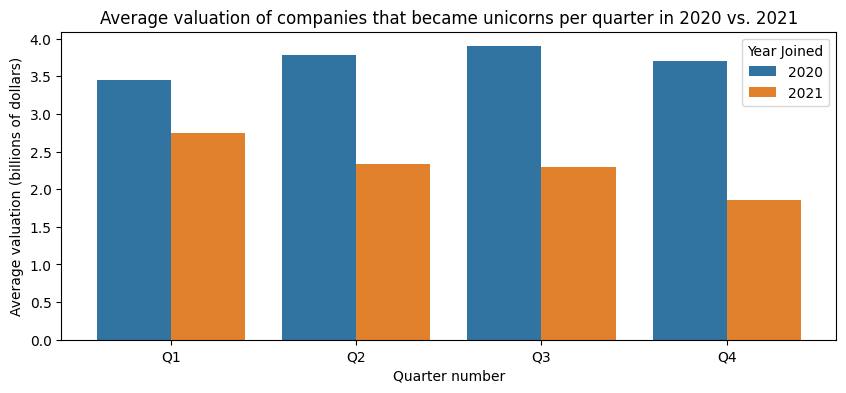

In [131]:
plt.figure(figsize = (10, 4))

sns.barplot(x=companies_by_quarter_2020_2021['Quarter Number'],
            y=companies_by_quarter_2020_2021['Average Valuation'],
            hue=companies_by_quarter_2020_2021['Year Joined'])
plt.plot()
plt.xlabel("Quarter number")
plt.ylabel("Average valuation (billions of dollars)")
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")
plt.show()